In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential

from keras.datasets import mnist


In [ ]:
# Install pydot 

# ! pip install pydot

In [ ]:
# Install Tensorflow

# ! pip install tensorflow

In [3]:
#Load Digit MNIST dataset
# tuple () - tuples are immutable (unchangeable)
# Returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [4]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

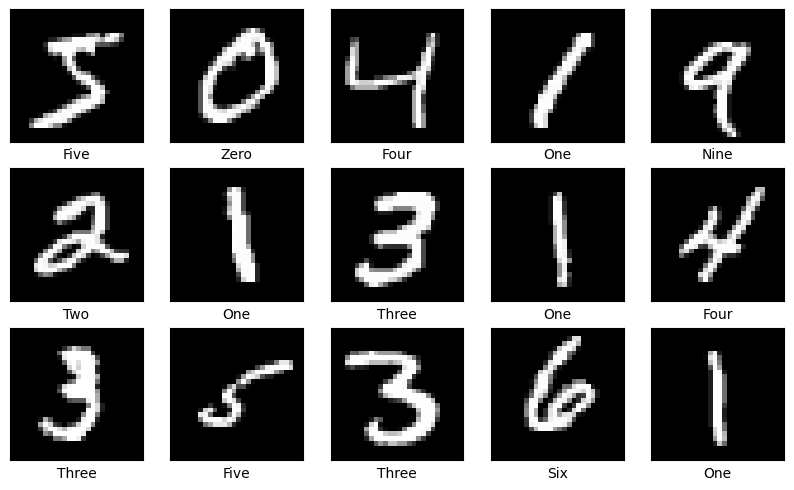

In [6]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)  # Three integers (nrows, ncols, index)
    plt.xticks([])        # Ticks are the markers denoting data points on axes.
    plt.yticks([])        # Passing an empty list removes all xticks and yticks.
    plt.imshow(X_train_digit[i], cmap='gray') # imshow - Display data as an image, cmap - colour maps
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

# Input - Preprocess - ANN - 3D to 2D

In [7]:
# shape - number of rows * number of columns

X_train_digit.shape


(60000, 28, 28)

In [ ]:
# o/p - 60000,28,28 

# (count,rows,columns)
# Total - 100000 entries
# Testing data count - 60000
# Training data count - 40000
# Output 3D
# ANN input dimension supports 2D
# so reshape() 3D into 2D
# 28*28 - 784
# 2D - 60000,784
# Flatten - rows and columns 28*28 flattening 

In [8]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [9]:
X_train_digit.shape

(60000, 784)

In [ ]:
# o/p - (60000,784)

# Output - Preprocess - ANN - One Hot Encoding

In [10]:
y_test_digit.shape

# output -(10000,)

(10000,)

In [19]:
from keras.utils import to_categorical

#Encoding Digit MNIST Labels

y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [20]:
# Output -Preprocess
# ANN -  One hot Encoding
# num_classes =10 (0,1,2,3,4,5,6,7,8,9) for digit dataset
# eg : num_classes=2 for dog and class dataset

# to_categorical() - Converts a class vector (integers) to binary class matrix (0 and 1)


In [21]:
y_train_digit[1]

# o/p - array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32) 
# the above output digit is 0

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# ANN - Sequential

In [22]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),   # Input Layer 784 neurons - 256 hidden layer
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),                        # 256 Hidden Layer - 64 Hidden layer
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),                        # 64 Hidden Layer - 64 Hidden Layer 
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),                     # Output Layer - 10
])


# Dropout is implemented by randomly selecting nodes to be dropped out 
# with a given probability (e.g., 20%) in each weight update cycle.

# Dense Layer

In [23]:
# Dense Layer
#param_number = output_channel_number * (input_channel_number + 1)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222218 (868.04 KB)
Trainable params: 222218 (868.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense (Dense)               (None, 256)               200960    # 256*(784+1)
                                                                 
 dense_1 (Dense)             (None, 64)                16448     # 64*(256+1)
                                                                 
 dense_2 (Dense)             (None, 64)                4160      # 64*(64+1)
                                                                 
 dense_3 (Dense)             (None, 10)                650       # 10*(64+1)
                                                                 
=================================================================
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0

# Model Compilation

In [24]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

# Model Creation

In [26]:
from tensorflow.keras.layers import Dense,Activation, Dropout

In [27]:
# Learning/Training the model

history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10


ValueError: Shapes (100, 10, 10) and (100, 10) are incompatible

# Predict test data

In [28]:
#Predicting the labels-DIGIT
# Predict test data

y_predict = model.predict(X_test_digit)

313/313 [==============================] - 1s 3ms/step


In [29]:
y_predict

array([[9.9974567e-01, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 9.9632061e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 9.9999994e-01],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 3.3072823e-34,
        1.0000000e+00, 9.4313899e-26],
       ...,
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 5.4814765e-29],
       [8.5534617e-29, 1.0000000e+00, 3.5815785e-28, ..., 1.8009802e-34,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [30]:
y_predict[0]

array([9.9974567e-01, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       2.7926587e-20, 3.2469764e-04, 3.6228415e-29, 0.0000000e+00,
       1.0000000e+00, 9.9632061e-01], dtype=float32)

In [ ]:
# Output
# array([1.19154155e-02, 2.38031149e-04, 9.39500093e-01, 9.81485844e-01,
       1.17501616e-03, 9.98406172e-01, 3.05942849e-09, 1.00000000e+00,
       9.98855948e-01, 9.98955905e-01], dtype=float32)

In [31]:
# y_predict - Predicted test data

y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_predicts

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
# output -array([7, 2, 1, ..., 4, 5, 5], dtype=int64)

# Actual Test data

In [32]:
# y_test_digit_eval - actual test data

y_test_digit_eval=np.argmax(y_test_digit, axis=1)
y_test_digit_eval

array([[0, 7, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# output - array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Supervised Learning
# Classification
# Confusion Matrix - (Actual Test data, Predicted Test data)

In [41]:
from scikeras.wrappers import KerasClassifier

In [40]:
# !pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata


In [42]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

# Classification Report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

# Accuracy Graph - Epoch
# Low to High 

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


# Loss Graph - Epoch
# High to Low

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [ ]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()